In [2]:
import nltk
import torch
import pandas as pd
import numpy as np
from glob import glob
from nltk import sent_tokenize
from transformers import pipeline

c:\Users\jaksh\Desktop\Programs\Projects\himym-analysis\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jaksh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jaksh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
device = 0 if torch.cuda.is_available() else "cpu"

__Load Model__

In [5]:
model = "facebook/bart-large-mnli"
clf = pipeline("zero-shot-classification", 
               model=model, 
               device=device)

c:\Users\jaksh\Desktop\Programs\Projects\himym-analysis\venv\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [6]:
test = "I like your phone, does it even work?"
classes = ["Love", "Appreciation", "Sarcasm", "Anger", "Hunger", "Dialogue"]

In [7]:
clf(test, classes, multi_label=True)

{'sequence': 'I like your phone, does it even work?',
 'labels': ['Sarcasm', 'Dialogue', 'Appreciation', 'Anger', 'Love', 'Hunger'],
 'scores': [0.9283308982849121,
  0.7683961391448975,
  0.6455283164978027,
  0.0011342098005115986,
  0.0003232487943023443,
  0.0002589166397228837]}

__Load Dataset__

In [8]:
subs = glob("../data/subs/*.srt")
subs[:5]

['../data/subs\\How I Met Your Mother - 01x01 - Pilot.1080p x265 Joy.English.C.updated.Addic7ed.com.srt',
 '../data/subs\\How I Met Your Mother - 01x02 - Purple giraffe.720.HDTV.CORTEXiPHAN.English.C.updated.Addic7ed.com.srt',
 '../data/subs\\How I Met Your Mother - 01x03 - The sweet taste of liberty.720.HDTV.CORTEXiPHAN.English.C.updated.Addic7ed.com.srt',
 '../data/subs\\How I Met Your Mother - 01x04 - Return of the shirt.720.HDTV.CORTEXiPHAN.English.C.updated.Addic7ed.com.srt',
 '../data/subs\\How I Met Your Mother - 01x05 - Okay awesome.720.HDTV.CORTEXiPHAN.English.C.updated.Addic7ed.com.srt']

In [9]:
# Understanding Data.
with open(subs[0], "r", encoding="utf-8") as f:
    con = f.read()
    print(con[:150])

1
00:00:04,388 --> 00:00:07,588
Kids, I'm gonna tell
you an incredible story ;

2
00:00:07,588 --> 00:00:09,828
the story of how I met your mother.




In [10]:
with open(subs[0], "r", encoding="utf-8") as f:
    lines = f.readlines()
    cnt = 0
    con = []
    for line in lines:
        line = line.strip()
        if line.isnumeric() or "-->" in line:
            cnt += 1
        else:
            con.append(line)

print(f"Ignored {cnt} lines out of {len(lines)}. Total lines {len(con)} now.")

Ignored 929 lines out of 2006. Total lines 1077 now.


In [11]:
# Episode
print(subs[0])
subs[0].split("-")[1].strip()[-1]

../data/subs\How I Met Your Mother - 01x01 - Pilot.1080p x265 Joy.English.C.updated.Addic7ed.com.srt


'1'

In [12]:
def load_subs():
    subs = glob("../data/subs/*.srt")
    episodes = []
    scripts = []

    for sub in subs:
        with open(sub, "r", encoding="utf-8") as f:
            lines = f.readlines()
            cnt = 0
            con = []
            for line in lines:
                line = line.strip()
                if line.isnumeric() or "-->" in line:
                    cnt += 1
                else:
                    con.append(line)
        
        script = " ".join(con)
        epno = int(sub.split("-")[1].strip()[-1])
        episodes.append(epno)
        scripts.append(script)

    df = pd.DataFrame({"episode": episodes, "script": scripts})
    return df

In [13]:
df = load_subs()

In [14]:
df.head()

,episode,script
0,1,"﻿1 Kids, I'm gonna tell you an incredible stor..."
1,2,"Sync by vNaru - Okay, where was I? - You were..."
2,3,S Sy Syn Sync Sync b Sync by Sync by v ...
3,4,"Sync by vNaru Kids, when you're single, all y..."
4,5,"Sync by vNaru So, kids, would you like to hea..."


__Model Testing__

In [15]:
script = df.iloc[0]["script"]
script

'\ufeff1 Kids, I\'m gonna tell you an incredible story ;  the story of how I met your mother.  Are we being punished for something?  No.  Yeah, is this gonna take a while?  Yes. 25 years ago, before I was Dad,  I had this whole other life.  It was way back in 2005.  I was 27, just starting to make it as an architect  and living in New York with Marshall, my best friend from college.  My life was good.  And then Uncle Marshall went and screwed the whole thing up.  Will you marry me?  Yes. Perfect!  And then you\'re engaged. You pop the champagne.  You drink a toast.  You have sex on the kitchen floor.  Don\'t have sex on our kitchen floor.  Got it.  Thanks for helping me plan this out, Ted.  Dude, are you kidding ? It\'s you and Lilly.  I\'ve been there for all the big moments of you and Lilly:  night you met, your first date, other first things.  Yeah, sorry. We thought you were asleep.  It\'s physics, Marshall.  If the bottom bunk moves, the top bunk moves, too.  My God.  You\'re gett

In [16]:
script_sentences = sent_tokenize(script)
script_sentences[:3]

["\ufeff1 Kids, I'm gonna tell you an incredible story ;  the story of how I met your mother.",
 'Are we being punished for something?',
 'No.']

In [17]:
# Batch sentences
sentence_batch_size = 20
script_batches = []

for index in range(0, len(script_sentences), sentence_batch_size):
    script_batches.append("".join(script_sentences[index:index + sentence_batch_size]))

In [18]:
len(script_batches)

26

In [19]:
theme_output = clf(
    script_batches[:2],
    classes,
    multi_label=True
)

theme_output

[{'sequence': "\ufeff1 Kids, I'm gonna tell you an incredible story ;  the story of how I met your mother.Are we being punished for something?No.Yeah, is this gonna take a while?Yes.25 years ago, before I was Dad,  I had this whole other life.It was way back in 2005.I was 27, just starting to make it as an architect  and living in New York with Marshall, my best friend from college.My life was good.And then Uncle Marshall went and screwed the whole thing up.Will you marry me?Yes.Perfect!And then you're engaged.You pop the champagne.You drink a toast.You have sex on the kitchen floor.Don't have sex on our kitchen floor.Got it.Thanks for helping me plan this out, Ted.",
  'labels': ['Dialogue', 'Sarcasm', 'Appreciation', 'Anger', 'Love', 'Hunger'],
  'scores': [0.24632984399795532,
   0.22967974841594696,
   0.19244104623794556,
   0.17093931138515472,
   0.021552560850977898,
   0.011540633626282215]},
 {'sequence': "Dude, are you kidding ?It's you and Lilly.I've been there for all the 

In [20]:
themes = {}
for output in theme_output:
    for label, score in zip(output["labels"], output["scores"]):
        if label not in themes:
            themes[label] = []
        themes[label].append(score)

In [21]:
themes

{'Dialogue': [0.24632984399795532, 0.63577800989151],
 'Sarcasm': [0.22967974841594696, 0.4210963547229767],
 'Appreciation': [0.19244104623794556, 0.496595561504364],
 'Anger': [0.17093931138515472, 0.19846327602863312],
 'Love': [0.021552560850977898, 0.2901376187801361],
 'Hunger': [0.011540633626282215, 0.1332704722881317]}

In [22]:
def get_theme_inference(script):

    classes = ["Sarcasm", "Happy", "Friendship", "Vulgar", "Anger", "Sad", "Love", "Narration"]
    script_sentences = sent_tokenize(script)
    sentence_batch_size = 20
    script_batches = []
    for index in range(0, len(script_sentences), sentence_batch_size):
        script_batches.append("".join(script_sentences[index:index + sentence_batch_size]))

    theme_output = clf(
        script_batches[:2],
        classes,
        multi_label=True
    )

    themes = {}
    for output in theme_output:
        for label, score in zip(output["labels"], output["scores"]):
            if label not in themes:
                themes[label] = []
            themes[label].append(score)
    
    themes = {key:np.mean(np.array(value)) for key, value in themes.items()}
    return themes

In [25]:
opdf = df.head(2)
temp = opdf["script"].apply(get_theme_inference)

In [27]:
themes = pd.DataFrame(temp.tolist())
themes

,Narration,Dialogue,Sarcasm,Vulgar,Anger,Sad,Love,Friendship,Happy
0,0.478483,0.441054,0.325388,0.163250,0.184701,0.098930,0.155845,0.167654,0.049714
1,0.822459,0.632703,0.475984,0.281316,0.155183,0.291596,0.635413,0.113331,0.032668


In [30]:
opdf.loc[:, themes.columns] = themes
opdf

,episode,script,Narration,Dialogue,Sarcasm,Vulgar,Anger,Sad,Love,Friendship,Happy
0,1,"﻿1 Kids, I'm gonna tell you an incredible stor...",0.478483,0.441054,0.325388,0.163250,0.184701,0.098930,0.155845,0.167654,0.049714
1,2,"Sync by vNaru - Okay, where was I? - You were...",0.822459,0.632703,0.475984,0.281316,0.155183,0.291596,0.635413,0.113331,0.032668


__Visualize__

In [31]:
op = opdf.drop(["episode", 'script'], axis=1).sum().reset_index()
op.columns = ["theme", "score"]
op

,theme,score
0,Narration,1.300941
1,Dialogue,1.073757
2,Sarcasm,0.801372
3,Vulgar,0.444566
4,Anger,0.339884
5,Sad,0.390525
6,Love,0.791258
7,Friendship,0.280985
8,Happy,0.082382


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

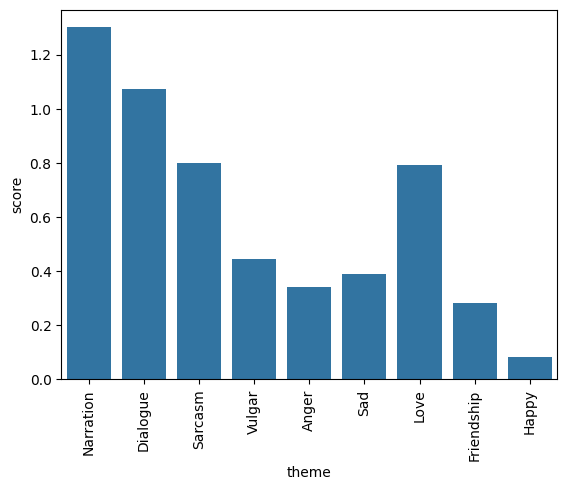

In [33]:
sns.barplot(x="theme", y="score", data=op)
plt.xticks(rotation=90)
plt.show()